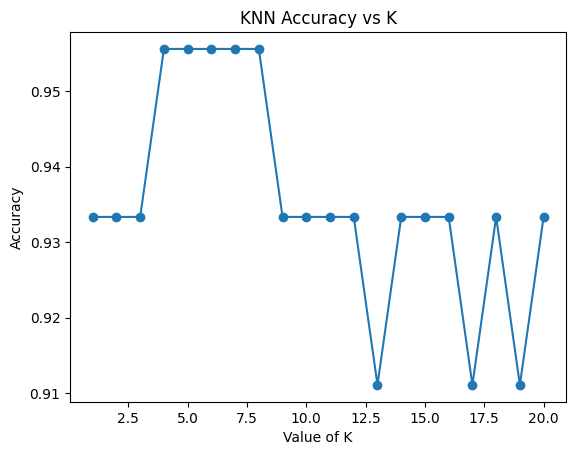

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Accuracy vs K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()

Accuracy: 0.9555555555555556
Error Rate: 0.0444444444444444
Precision: 0.9629629629629629
Recall: 0.9607843137254902
F1 Score: 0.9595588235294118


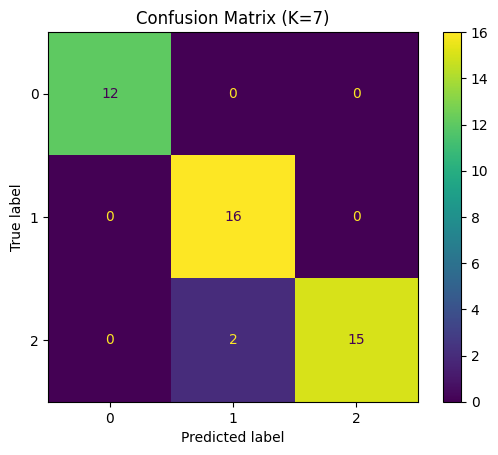

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

K = 7

# Train final model
knn = KNeighborsClassifier(n_neighbors=K, weights='distance')
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy & Error
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

#Precision, Recall and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix (K={K})")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
K = 7
knn = KNeighborsClassifier(n_neighbors=K, weights='distance')
knn.fit(X_train, y_train)

# -------- USER INPUT --------
print("Enter flower measurements:")
sepal_length = float(input("Sepal length (cm): "))
sepal_width  = float(input("Sepal width (cm): "))
petal_length = float(input("Petal length (cm): "))
petal_width  = float(input("Petal width (cm): "))

# Convert input to array and scale
user_input = [[sepal_length, sepal_width, petal_length, petal_width]]
user_input_scaled = scaler.transform(user_input)

# Prediction
prediction = knn.predict(user_input_scaled)
predicted_class = iris.target_names[prediction[0]]

print("\nPredicted Flower Class:", predicted_class)


Enter flower measurements:
Sepal length (cm): 18
Sepal width (cm): 29
Petal length (cm): 43
Petal width (cm): 21

Predicted Flower Class: virginica
